## Principal Component Analysis (PCA)

`Principal Component Analysis (PCA)` is a technique used for **dimensionality reduction**. It transforms high-dimensional data into a lower-dimensional space while preserving as much variance as possible. This is useful for **visualization, noise reduction, and speeding up machine learning models**.

### How PCA Works:

1. **Standardization**: The data is scaled to have a mean of 0 and a variance of 1.
2. **Covariance Matrix Calculation**: Relationships between different features are analyzed.
3. **Eigenvalues & Eigenvectors**: These define the principal components—new axes that best explain the variance in the data.
4. **Transformation**: Data is projected onto the new principal component space.

### Applications of PCA:

- **Data Visualization:** Reducing dimensions to 2D or 3D for plotting.
- **Noise Reduction:** Removing less significant components to filter out noise.
- **Feature Extraction:** Selecting the most important patterns in the dataset.
- **Speeding up ML models:** Reducing computational complexity by working with fewer features.


In [4]:
import sklearn.decomposition
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

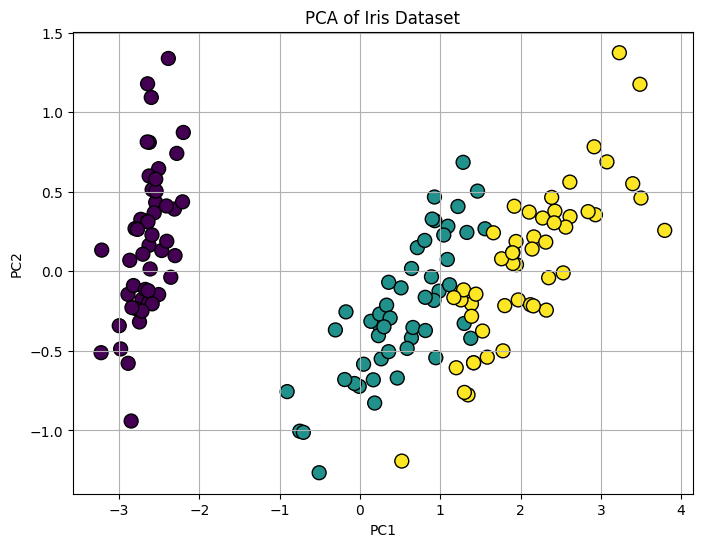

In [5]:
#load dataset
from sklearn.datasets import load_iris
iris=load_iris()
# Let's say that we want to reduce the dimensionality of the dataset to 2D
pca = PCA(n_components=2)
#Fit and transform the data
iris_pca = pca.fit_transform(iris.data)
# Now we can plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=iris.target, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


In [6]:
iris_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

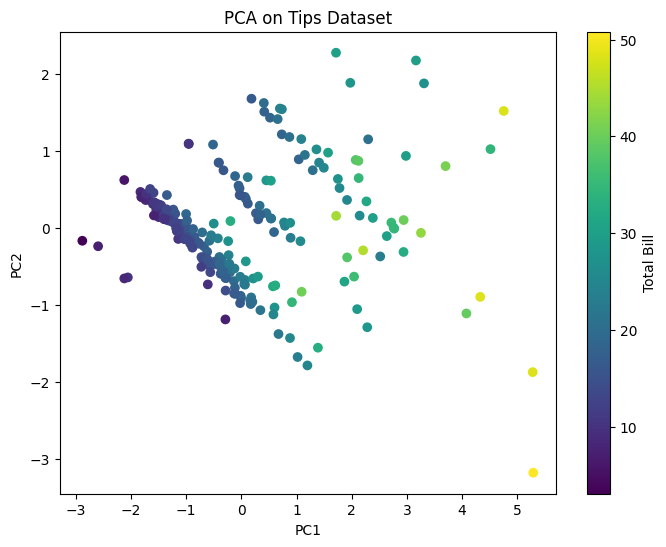

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
tips = sns.load_dataset("tips")

# Selecting numeric columns for PCA
numeric_cols = tips.select_dtypes(include=['number'])

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creating a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=tips['total_bill'], cmap='viridis')
plt.colorbar(label='Total Bill')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on Tips Dataset')

plt.show()


In [8]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


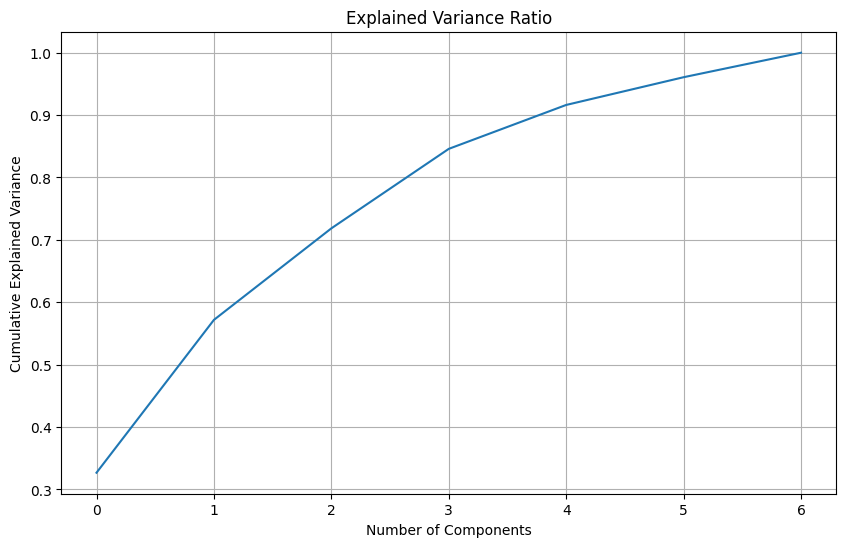

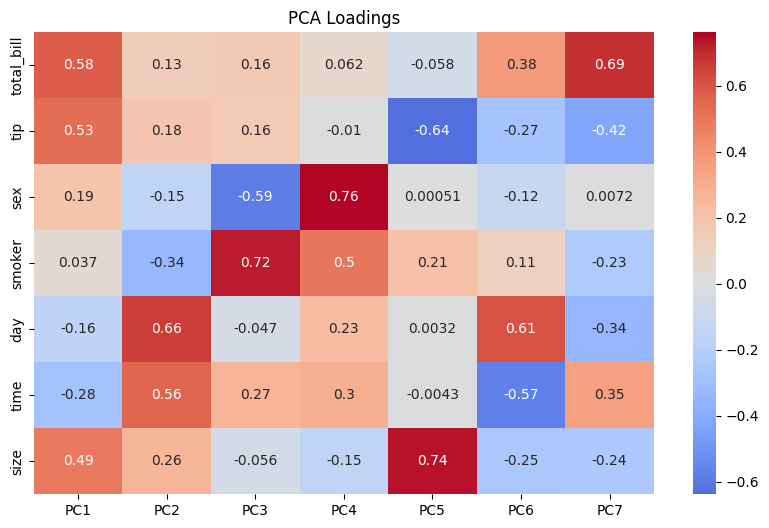

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Load the dataset
tips = sns.load_dataset("tips")
#Preprocessing
# Convert categorical variables to numeric using Label Encoding
le=LabelEncoder()
cat_features=tips.select_dtypes(include=['category']).columns
for col in cat_features:
    tips[col]=le.fit_transform(tips[col])
# Standardize the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(tips)
# Apply PCA
pca=PCA()
X_pca=pca.fit_transform(scaled_data)
#Plot the explained variance ratio
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid()
plt.show()
# create a dataframe to show the loadings
loadings = pd.DataFrame(pca.components_, columns=tips.columns, index=[f'PC{i+1}' for i in range(len(tips.columns))])
loadings = loadings.T
loadings.columns = [f'PC{i+1}' for i in range(len(loadings.columns))]
loadings.head(5)
# Plot the loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Loadings')
plt.show()
